- Here we are considering polynominal representations between the X and y of a data set (input and output).
- Additionally, if we have more than one input (x1, x2, x3, etc.) than we can consider how a combination of two inputs affects the output, y. For example if we are considering an advertising campaign, we can see both Facebook and Twitter advestining affects the output. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis=1)

In [5]:
y = df["sales"]

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [71]:
temp = polynomial_converter.fit(X)

In [25]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
poly_features = polynomial_converter.transform(X)

In [19]:
poly_features.shape 
# the new polynomial features include 6 more terms, each feature sqaured, and then each of the interaction terms

(200, 9)

In [13]:
X.shape

(200, 3)

In [16]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [18]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [24]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
#help(train_test_split)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [35]:
test_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
MAE = mean_absolute_error(y_test, test_pred)

In [40]:
MSE = mean_squared_error(y_test, test_pred)

In [44]:
RSME = np.sqrt(MSE)

In [41]:
MAE

0.4896798044803811

In [42]:
MSE

0.4417505510403745

In [45]:
RSME

0.6646431757269268

- In the previous model where we ran linear regression, with only three features, we had a much larger MAE and RSME
- This model is much better

In [46]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [47]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [48]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

## Bias and Variance Tradeoff (Overfitting and underfitting)

- How do we know what is the best degree for a polynomial, what are the tradeoffs with increasing the model complexity
- This tradeoff is known as the biase and variance tradeoff; we want our model to be able to generalize well to never seen data, but also look at the variance and patterns in the current data
- Overfitting: model fits too well with the noise in the data -> leads to very low errors in the training data, and high error in the testing set. Has too much variance.
- Underfitting: Does not fit the training data at all. There is low variance, but lots of bias in this type of data. This is usually the result of a very simple model.
- It is easy to detect over and under fitting when we only have one X value (one input) since we can graph it, what do we do when there is more than one input value: 
    - Plot the error versus model complexity
    - Good model: has less error as model complexity increases
    - Bad Model: Larger error as the model complexitiy increases
    - We want to graph model complexitity vs Errors for both the test and training set. if both follow the "good model" relation (error decreases with model complexitity)

In [50]:
# To test out which degree of polynomial is suitable, we can test out each degree

In [52]:
# create the poly, split the training and testing error, fit and train
# store the error for both the train and testing data, plot

In [57]:
train_rsme_error = []
test_rsme_error = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rsme_error.append(np.sqrt(mean_squared_error(train_pred, y_train)))
    test_rsme_error.append(np.sqrt(mean_squared_error(test_pred, y_test)))

In [58]:
train_rsme_error

[1.7345941243293763,
 0.587957408529223,
 0.43393443569020673,
 0.35170836883993495,
 0.25093429466510114,
 0.1963609702219172,
 5.421420881605955,
 0.14183260320477836,
 0.16653984493824503]

In [60]:
test_rsme_error

[1.5161519375993877,
 0.6646431757269268,
 0.5803286825165035,
 0.5077742649176811,
 2.575831221641967,
 4.494603690692503,
 1381.40448312036,
 4449.599562856071,
 95891.24542970624]

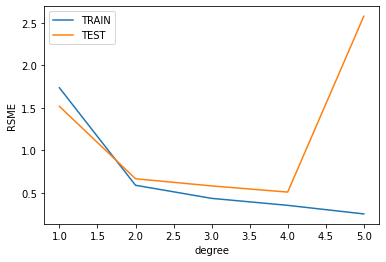

In [66]:
plt.plot(range(1,6),train_rsme_error[:5],label="TRAIN")
plt.plot(range(1,6),test_rsme_error[:5],label="TEST")
plt.xlabel("degree")
plt.ylabel("RSME")
plt.legend()

In [67]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [68]:
final_model = LinearRegression()

In [75]:
# Not splitting the data here since this is the final model
final_X = final_poly_converter.fit_transform(X)

In [74]:
final_model.fit(final_X,y)

LinearRegression()

In [76]:
from joblib import dump,load

In [77]:
dump(final_model, "poly_model.joblib")

['poly_model.joblib']

In [78]:
dump(final_poly_converter, "poly_converter.joblib")

['poly_converter.joblib']

In [79]:
converter = load("poly_converter.joblib")

In [80]:
model = load("poly_model.joblib")

In [81]:
campaign = [[149, 22, 12]]

In [82]:
converted_cam = converter.fit_transform(campaign)

In [83]:
model.predict(converted_cam)

array([14.64501014])